In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
dataset = pd.read_csv('/Users/sachinkarthikeya/Desktop/Projects/CT Internship/Dataset.csv')
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
dataset.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [5]:
X = dataset[['Longitude', 'Latitude']].dropna().values
print(X)

[[121.027535    14.565443  ]
 [121.014101    14.553708  ]
 [121.056831    14.581404  ]
 ...
 [ 29.03464001  41.05581715]
 [ 29.036019    41.057979  ]
 [ 29.02601603  40.98477563]]


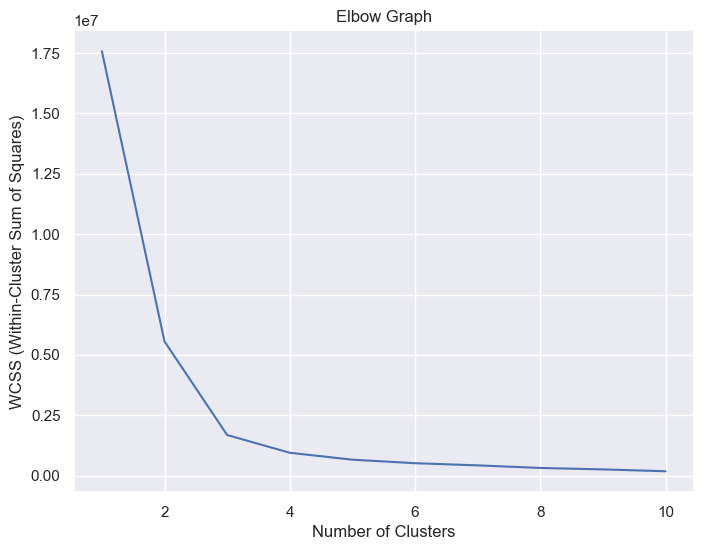

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

sns.set()
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
Y = kmeans.fit_predict(X)

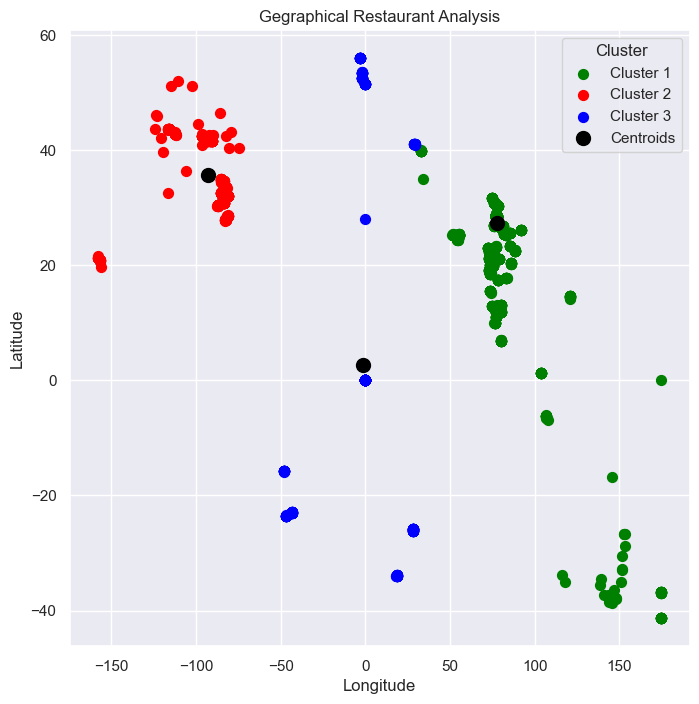

In [8]:
plt.figure(figsize=(8, 8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c='blue', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('Gegraphical Restaurant Analysis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64


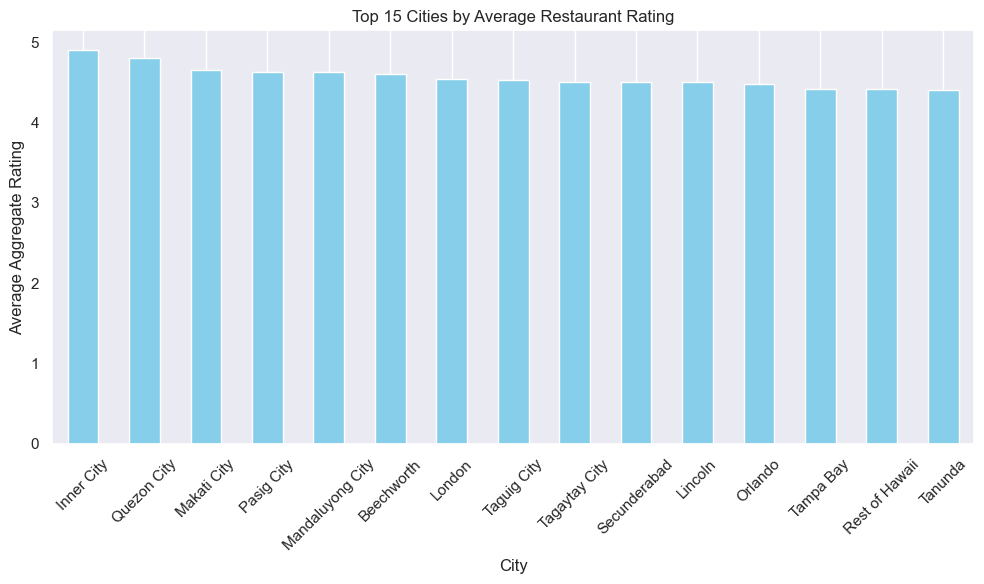

In [9]:
city_avg = dataset.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print(city_avg)

plt.figure(figsize=(10, 6))
city_avg.head(15).plot(kind='bar', color='skyblue')
plt.title("Top 15 Cities by Average Restaurant Rating")
plt.ylabel("Average Aggregate Rating")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

City
Princeton           4.0
Inner City          4.0
Vineland Station    4.0
Johannesburg        4.0
Panchkula           4.0
                   ... 
Lakeview            1.0
Lakes Entrance      1.0
Inverloch           1.0
Fernley             1.0
Clatskanie          1.0
Name: Price range, Length: 141, dtype: float64


/var/folders/9n/36z1w1992vq4w3p2173txb180000gn/T/ipykernel_91611/2839925733.py:10: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


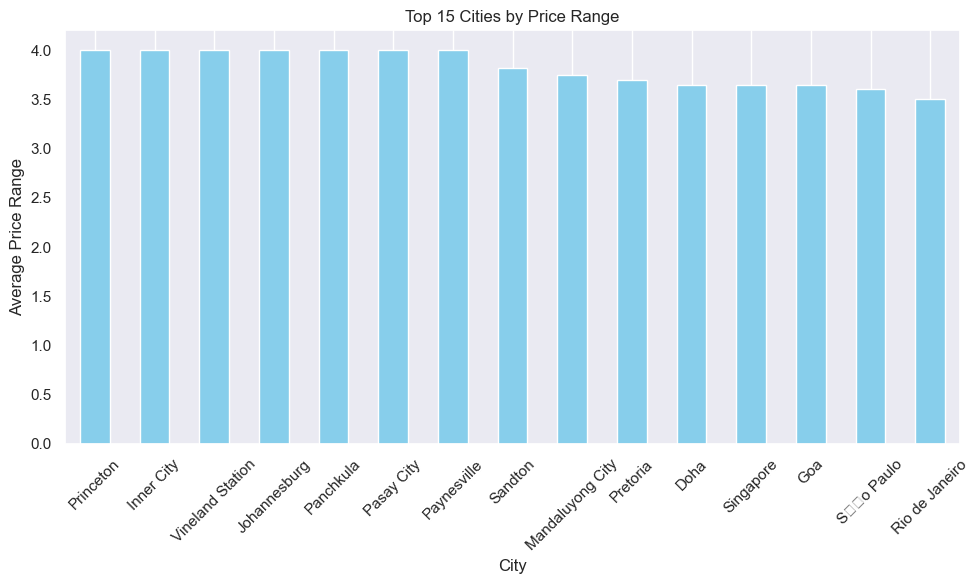

In [10]:
city_avg = dataset.groupby('City')['Price range'].mean().sort_values(ascending=False)
print(city_avg)

plt.figure(figsize=(10, 6))
city_avg.head(15).plot(kind='bar', color='skyblue')
plt.title("Top 15 Cities by Price Range")
plt.ylabel("Average Price Range")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()